### 0. Google Drive 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Google Colab GPU 확인

In [ ]:
# GPU 사용 가능 여부 확인
import torch
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
print(f"GPU 개수: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"현재 GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

CUDA 사용 가능: True
GPU 개수: 1
현재 GPU: NVIDIA A100-SXM4-40GB
GPU 메모리: 39.6 GB


### 2. YOLOv7 설치 및 준비

In [ ]:
# YOLOv7 클론
!rm -rf /content/yolov7
!git clone https://github.com/WongKinYiu/yolov7.git
%cd /content/yolov7

# 필요한 라이브러리 설치
!pip install -r requirements.txt
!pip install numpy==1.26.4 protobuf==4.25.3 --force-reinstall --no-deps

# 사전 훈련된 가중치 다운로드
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 19.13 MiB/s, done.
Resolving deltas: 100% (513/513), done.
/content/yolov7
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached protobuf-4.21.2-cp37-abi3-manylinux2014_x86_64.whl.metadata (540 bytes)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached protobuf-4.21.2-cp37-abi3-manylinux2014_x86_64.whl (407 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
  Attempting uninstall: numpy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0/2 [protobuf]    WARNING: Ignoring invalid distribution ~umpy (/usr/local/lib/python3.11/dist-packages)
    Found existing installation:

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [numpy]


--2025-08-11 13:29:29--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-11T14%3A19%3A38Z&rscd=attachment%3B+filename%3Dyolov7.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-11T13%3A19%3A28Z&ske=2025-08-11T14%3A19%3A38Z&sks=b&skv=2018-11-09&sig=3dF%2B5OIoq93pMwTX4iy4ZdUHKoOzSEWIMEq%2Fu%2B5l23Y%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDkxOTI3MCwibmJmIjoxNzU0OTE4OTcwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvcmUu

### 3. 학습 명령어

In [ ]:
# Colab 런타임 강제 재시작 코드
import os
os.kill(os.getpid(), 9)

In [ ]:
# ⚠️ 런타임 초기화 후, 아래 셀을 처음에 실행하세요
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

# 필요한 최소 패키지 설치 (TensorFlow 등 제거)
!pip uninstall -y tensorflow jax jaxlib
!pip install -r requirements.txt
!pip install numpy==1.23.5 protobuf==4.21.2 --force-reinstall --no-deps

# ⚠️ Tensorboard 관련 에러 방지용 코드 비활성화
!sed -i 's/from torch.utils.tensorboard import SummaryWriter/# from torch.utils.tensorboard import SummaryWriter/' train.py
!sed -i 's|writer = SummaryWriter(log_dir=save_dir)|writer = None|' train.py

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 35.53 MiB/s, done.
Resolving deltas: 100% (513/513), done.
/content/yolov7/yolov7
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached protobuf-4.21.2-cp37-abi3-manylinux2014_x86_64.whl.metadata (540 bytes)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
Using cached protobuf-4.21.2-cp37-abi3-manylinux2014_x86_64.whl (407 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.2
    Uninstalling protobuf-4.21.2:
      Successfully uninstalled protobuf-4.21.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
# 1. yolov7 폴더로 이동
%cd yolov7

# 2. Tensorboard 관련 코드 비활성화
!sed -i 's/from torch.utils.tensorboard import SummaryWriter/# from torch.utils.tensorboard import SummaryWriter/' train.py
!sed -i 's|writer = SummaryWriter(log_dir=save_dir)|writer = None|' train.py

/content/yolov7


In [ ]:
# 심볼릭 링크 생성
!ln -sf /content/drive/MyDrive/AIVLE/빅프로젝트/guideDetection/dataset/synthetic_data /content/yolov7/synthetic_data

# 확인
!ls -la /content/yolov7/synthetic_data/train/images/ | head -5

total 8922400
-rw------- 1 root root  178259 Jul 29 06:40 file_000000000.jpg
-rw------- 1 root root 1059634 Jul 29 06:40 file_000000001.jpg
-rw------- 1 root root  323476 Jul 29 06:40 file_000000002.jpg
-rw------- 1 root root  263334 Jul 29 06:40 file_000000003.jpg


In [ ]:
# 학습 시작
data_yaml_path = "/content/drive/MyDrive/AIVLE/빅프로젝트/guideDetection/dataset/data.yaml"

# 데이터셋 캐시만 생성 (스캔 + 캐시 저장)
!python train.py --data {data_yaml_path} --cfg cfg/training/yolov7.yaml --weights yolov7.pt --batch-size 16 --epochs 1 --img-size 640 --device 0 --name cache_creation --cache-images

YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7.yaml', data='/content/drive/MyDrive/AIVLE/빅프로젝트/guideDetection/dataset/data.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=1, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=True, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='cache_creation', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/cache_creation', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, 

---
# 백업 및 EarlyStopping 명령어

In [ ]:
# YOLOv7 설치
!rm -rf /content/yolov7/

%cd /content
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install torch torchvision opencv-python pillow pyyaml requests scipy tqdm matplotlib seaborn pandas thop
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

/content
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.29 MiB | 23.09 MiB/s, done.
Resolving deltas: 100% (513/513), done.
/content/yolov7
--2025-08-11 13:40:07--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-11T14%3A21%3A49Z&rscd=attachment%3B+filename%3Dyolov7.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-11T13%3A21%3A36Z&ske=2025-08-11T14%3A21%3A49Z&sks=b&skv=2018-11-09&sig=eAe3chBfyn0zQBGdYFXB7IO

In [ ]:
import shutil
import time
import threading
import os

def backup_with_early_stopping():
    backed_up_epochs = set()
    best_map = 0.0
    patience = 10
    no_improve_count = 0

    run_name = "training_ver_13"
    base_dir = f"/content/yolov7/runs/train/{run_name}"
    backup_dir = "/content/drive/MyDrive/backup_auto"
    os.makedirs(backup_dir, exist_ok=True)

    while True:
        try:
            results_file = f"{base_dir}/results.txt"
            if not os.path.exists(results_file):
                time.sleep(60)
                continue

            with open(results_file, 'r') as f:
                lines = f.readlines()

            valid_line = None
            for line in reversed(lines):
                line = line.strip()
                if line and not line.startswith('#'):
                    valid_line = line
                    break

            if not valid_line:
                time.sleep(60)
                continue

            parts = valid_line.split()
            # epoch 번호 추출
            epoch_str = parts[0]
            if '/' in epoch_str:
                epoch = int(epoch_str.split('/')[0])
            else:
                epoch = int(float(epoch_str))


            if len(parts) >= 10:
                current_map = float(parts[9])
                if current_map > best_map:
                    best_map = current_map
                    no_improve_count = 0
                    print(f"📈 [성능 개선] Epoch {epoch}: mAP@0.5 = {current_map:.4f}")
                else:
                    no_improve_count += 1
                    print(f"📊 [Epoch {epoch}] mAP@0.5 = {current_map:.4f} (개선 없음: {no_improve_count}/{patience})")

                if no_improve_count >= patience:
                    print(f"🛑 [Early Stopping] {patience} epochs 동안 개선 없음. 학습 중단 권장!")
                    os.system("pkill -f 'python train.py'")
                    return

            if epoch % 3 == 0 and epoch not in backed_up_epochs:
                last_pt = f"{base_dir}/weights/last.pt"
                best_pt = f"{base_dir}/weights/best.pt"

                # 최대 60초 동안 파일 대기
                for _ in range(6):
                    if os.path.exists(last_pt) and os.path.exists(best_pt):
                        break
                    time.sleep(10)

                if os.path.exists(last_pt):
                    shutil.copy(last_pt, f"{backup_dir}/backup_epoch_{epoch}_last.pt")
                if os.path.exists(best_pt):
                    shutil.copy(best_pt, f"{backup_dir}/backup_epoch_{epoch}_best.pt")

                backed_up_epochs.add(epoch)
                print(f"✅ [Epoch {epoch} 백업 완료] {time.strftime('%H:%M:%S')}")

        except Exception as e:
            print("⚠️ [모니터링 실패]:", e)

        time.sleep(120)

# 스레드 실행
threading.Thread(target=backup_with_early_stopping, daemon=True).start()
time.sleep(5)  # 안정적인 실행 보장
print("🔄 백업 + Early Stopping 모니터링 시작!")

📈 [성능 개선] Epoch 14: mAP@0.5 = 0.9008
🔄 백업 + Early Stopping 모니터링 시작!


## 학습 재개

In [ ]:
%cd /content/yolov7

data_yaml_path = "/content/data.yaml"
!python train.py --data {data_yaml_path} --cfg cfg/training/yolov7.yaml --weights yolov7.pt --batch-size 20 --epochs 25 --img-size 416 --device 0 --workers 4 --name training_ver_1

/content/yolov7
2025-08-06 01:46:18.127475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754444778.149126   24733 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754444778.155320   24733 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-06 01:46:18.175686: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Namespace(weights='yolov7.pt', c

---

# Reference images를 활용한 재학습

## 재학습

In [ ]:
%cd /content
!python yolov7/train.py \
    --data mixed_data.yaml \
    --cfg yolov7/cfg/training/yolov7.yaml \
    --weights yolov7/runs/train/training_ver_13/weights/best.pt \
    --batch-size 20 \
    --epochs 15 \
    --img-size 416 \
    --device 0 \
    --workers 4 \
    --name mixed_training_v1 \
    --cache

/content
2025-08-07 02:26:40.139034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754533600.167351   38068 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754533600.176773   38068 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754533600.218598   38068 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754533600.218631   38068 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754533600.218636   38068 computation_placer.cc:177] computation p

# 해상도 높여서 추가 학습 (Fine-tuning)

In [ ]:
%cd /content
!python yolov7/train.py \
    --data mixed_data.yaml \
    --cfg yolov7/cfg/training/yolov7.yaml \
    --weights runs/train/step1_512_resolution/weights/best.pt \
    --batch-size 12 \
    --epochs 35 \
    --img-size 640 \
    --device 0 \
    --workers 4 \
    --name step2_640_resolution \
    --cache

/content
2025-08-11 14:03:25.518349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754921005.539417   16305 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754921005.545757   16305 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754921005.563572   16305 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754921005.563601   16305 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754921005.563607   16305 computation_placer.cc:177] computation p

# 그냥 640 해상도로 다시 학습

In [ ]:
!wget -O yolov7.pt https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

!ls -la yolov7.pt

--2025-08-11 15:10:46--  https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/511187726/b0243edf-9fb0-4337-95e1-42555f1b37cf?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-11T16%3A00%3A22Z&rscd=attachment%3B+filename%3Dyolov7.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-11T15%3A00%3A09Z&ske=2025-08-11T16%3A00%3A22Z&sks=b&skv=2018-11-09&sig=reGQoyyEbyWgmR8bOS0%2BcddEIWoSWuFU5%2FIIsX%2FAwxA%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NDkyNTM0NywibmJmIjoxNzU0OTI1MDQ3LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNvcmUu

In [ ]:
%cd /content
!python yolov7/train.py \
    --data data.yaml \
    --cfg yolov7/cfg/training/yolov7.yaml \
    --weights yolov7.pt \
    --batch-size 4 \
    --epochs 40 \
    --img-size 640 \
    --device 0 \
    --workers 4 \
    --name pure_synthetic_640 \
    #--cache

/content
2025-08-11 16:14:51.234790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754928891.509547   50839 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754928891.575904   50839 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754928892.080767   50839 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754928892.080813   50839 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754928892.080818   50839 computation_placer.cc:177] computation p

In [ ]:
%cd /content
!python yolov7/train.py \
    --resume /content/runs/train/pure_synthetic_6403/weights/last.pt \
    --device 0

/content
2025-08-12 00:31:10.076598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754958670.097065  177740 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754958670.103398  177740 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754958670.120499  177740 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754958670.120527  177740 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754958670.120531  177740 computation_placer.cc:177] computation p

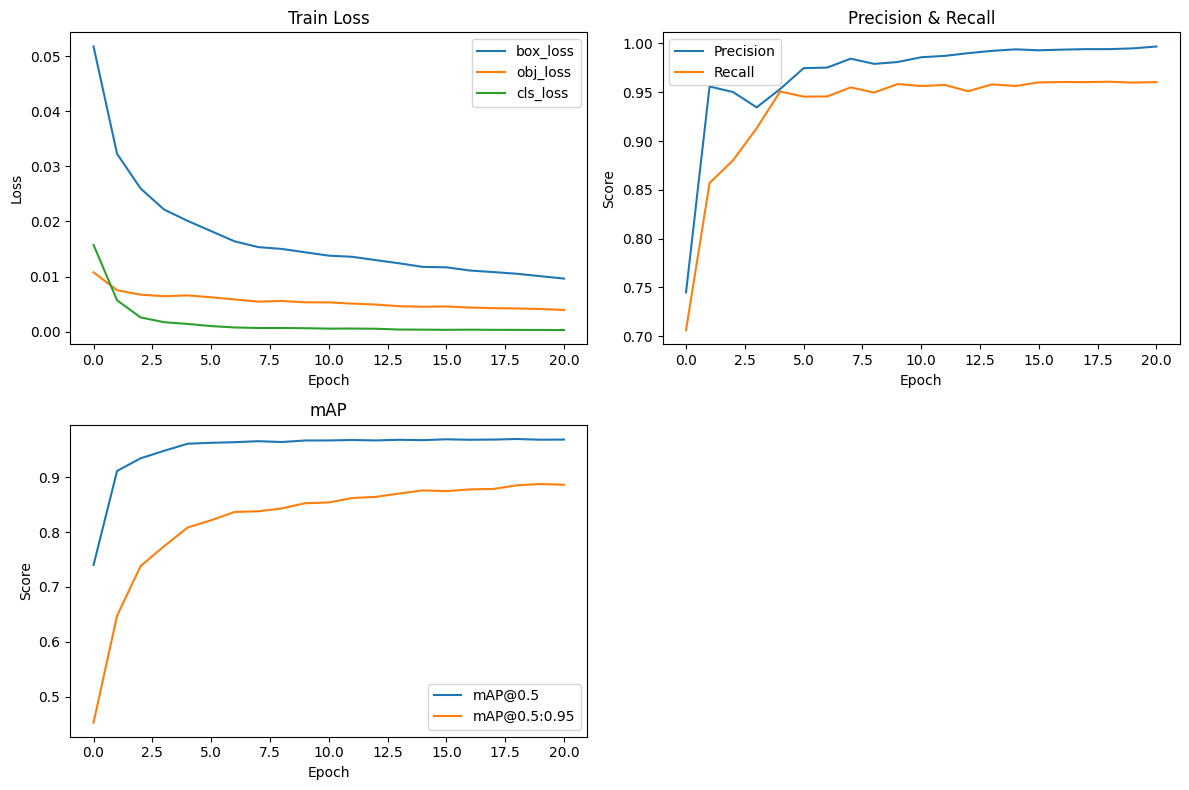

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 경로 지정
log_path = "/content/runs/train/pure_synthetic_6403/results.txt"

# 열 이름 정의 (YOLOv7 기준)
columns = [
    "epoch", "gpu_mem", "box", "obj", "cls", "total", "labels", "img_size",
    "precision", "recall", "mAP_0.5", "mAP_0.5:0.95", "val_box", "val_obj", "val_cls"
]

# 공백 기준으로 읽기
df = pd.read_csv(log_path, sep=r"\s+", names=columns)

# 숫자형으로 변환
df = df.apply(pd.to_numeric, errors='coerce')

# 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['box'], label='box_loss')
plt.plot(df['obj'], label='obj_loss')
plt.plot(df['cls'], label='cls_loss')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['precision'], label='Precision')
plt.plot(df['recall'], label='Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['mAP_0.5'], label='mAP@0.5')
plt.plot(df['mAP_0.5:0.95'], label='mAP@0.5:0.95')
plt.title('mAP')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
%cd /content
!python yolov7/train.py \
    --resume /content/runs/train/pure_synthetic_6403/weights/last.pt \
    --device 0

/content
2025-08-12 04:45:09.219694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754973909.413610  240935 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754973909.469761  240935 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754973909.877403  240935 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754973909.877468  240935 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754973909.877474  240935 computation_placer.cc:177] computation p

In [ ]:
import json
import os
from pathlib import Path
import numpy as np

def coco_to_yolo_bbox(coco_bbox, img_width, img_height):
    """
    COCO bbox [x, y, width, height] -> YOLO bbox [x_center, y_center, width, height] (normalized)
    """
    x, y, w, h = coco_bbox

    # YOLO 형식으로 변환 (normalized)
    x_center = (x + w/2) / img_width
    y_center = (y + h/2) / img_height
    width = w / img_width
    height = h / img_height

    return [x_center, y_center, width, height]

def convert_real_test_coco_to_yolo(coco_json_path, dataset_folder):
    """
    Real labeled test set의 COCO 형식을 YOLO 형식으로 변환
    기존 폴더 구조를 유지하면서 labels 폴더만 추가

    Args:
        coco_json_path: COCO JSON 파일 경로 (annotations.json)
        dataset_folder: real_labeled_test_set 폴더 경로
    """
    print(f"🔄 Real test set 변환 시작...")
    print(f"  - JSON 파일: {coco_json_path}")
    print(f"  - 데이터셋 폴더: {dataset_folder}")

    # JSON 파일 로드
    with open(coco_json_path, 'r') as f:
        coco_data = json.load(f)

    print(f"📊 COCO 데이터 정보:")
    print(f"  - 이미지 수: {len(coco_data['images'])}")
    print(f"  - 어노테이션 수: {len(coco_data['annotations'])}")
    print(f"  - 카테고리 수: {len(coco_data['categories'])}")

    # labels 폴더 생성 (같은 레벨에)
    labels_dir = Path(dataset_folder) / 'labels'
    labels_dir.mkdir(exist_ok=True)
    print(f"📁 Labels 폴더 생성: {labels_dir}")

    # 이미지 ID를 키로 하는 딕셔너리 생성
    images_dict = {img['id']: img for img in coco_data['images']}

    # 카테고리 ID 매핑 (COCO category_id -> YOLO class_id)
    # 클래스 이름 순서대로 정렬하여 consistent한 매핑 생성
    categories_sorted = sorted(coco_data['categories'], key=lambda x: x['name'])
    category_mapping = {}
    class_names = []

    for i, cat in enumerate(categories_sorted):
        category_mapping[cat['id']] = i
        class_names.append(cat['name'])

    print(f"🏷️  클래스 매핑:")
    for cat in categories_sorted:
        yolo_id = category_mapping[cat['id']]
        print(f"  - {cat['name']}: COCO ID {cat['id']} -> YOLO ID {yolo_id}")

    # 각 이미지별로 annotation 그룹화
    image_annotations = {}
    for ann in coco_data['annotations']:
        image_id = ann['image_id']
        if image_id not in image_annotations:
            image_annotations[image_id] = []
        image_annotations[image_id].append(ann)

    # 라벨 파일 생성
    converted_count = 0
    total_annotations = 0

    for image_id, image_info in images_dict.items():
        # 라벨 파일 이름 생성
        label_file_name = Path(image_info['file_name']).stem + '.txt'
        label_file_path = labels_dir / label_file_name

        with open(label_file_path, 'w') as f:
            # 해당 이미지의 모든 annotation 처리
            if image_id in image_annotations:
                for ann in image_annotations[image_id]:
                    # YOLO 클래스 ID
                    yolo_class_id = category_mapping[ann['category_id']]

                    # bbox를 YOLO 형식으로 변환
                    yolo_bbox = coco_to_yolo_bbox(
                        ann['bbox'],
                        image_info['width'],
                        image_info['height']
                    )

                    # YOLO 형식으로 저장: class_id x_center y_center width height
                    line = f"{yolo_class_id} {' '.join(map(str, yolo_bbox))}\n"
                    f.write(line)
                    total_annotations += 1

        converted_count += 1

    print(f"✅ 변환 완료!")
    print(f"  - 변환된 이미지: {converted_count}개")
    print(f"  - 총 어노테이션: {total_annotations}개")
    print(f"  - Labels 경로: {labels_dir}")

    return category_mapping, coco_data, class_names

def create_real_test_data_yaml(class_names):
    """
    Real test set 평가용 data.yaml 파일 생성
    """
    print(f"📝 Real test 평가용 data.yaml 생성...")

    yaml_content = f"""# Real test set evaluation configuration
train: synthetic_data/train/images
val: synthetic_data/valid/images
test: real_labeled_test_set/images

nc: {len(class_names)}
names: {class_names}
"""

    data_yaml_path = '/content/real_data.yaml'
    with open(data_yaml_path, 'w') as f:
        f.write(yaml_content)

    print(f"✅ real_data.yaml 생성 완료: {data_yaml_path}")
    return data_yaml_path

def reorganize_and_check_real_test():
    """
    Real test set 구조 정리 및 확인
    """
    real_test_path = "/content/real_labeled_test_set"

    print(f"🔍 Real test set 구조 확인 및 정리: {real_test_path}")

    if not os.path.exists(real_test_path):
        print(f"❌ Real test set을 찾을 수 없습니다: {real_test_path}")
        return False

    # 1. 현재 구조 확인
    contents = os.listdir(real_test_path)
    print(f"📁 현재 폴더 내용: {contents}")

    # 2. 이미지 파일들을 images 폴더로 이동
    image_files = [f for f in contents if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        print(f"🔄 {len(image_files)}개 이미지 파일을 images 폴더로 이동 중...")

        # images 폴더 생성
        images_dir = Path(real_test_path) / 'images'
        images_dir.mkdir(exist_ok=True)

        # 이미지 파일들 이동
        import shutil
        moved_count = 0
        for img_file in image_files:
            src = Path(real_test_path) / img_file
            dst = images_dir / img_file

            if not dst.exists():
                shutil.move(str(src), str(dst))
                moved_count += 1

        print(f"✅ {moved_count}개 이미지 파일 이동 완료")

    # 3. 필요한 파일들 확인 (수정된 파일명)
    required_files = ['coco_segmentations.json', 'images']
    missing_files = []

    contents = os.listdir(real_test_path)  # 다시 확인
    for req_file in required_files:
        if req_file not in contents:
            missing_files.append(req_file)

    if missing_files:
        print(f"❌ 누락된 파일/폴더: {missing_files}")
        return False

    # 4. 이미지 개수 확인
    images_path = f"{real_test_path}/images"
    if os.path.exists(images_path):
        image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
        print(f"🖼️  이미지 파일 수: {len(image_files)}")

    # 5. coco_segmentations.json 내용 확인
    json_path = f"{real_test_path}/coco_segmentations.json"
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        print(f"📊 COCO 데이터 정보:")
        print(f"  - 이미지: {len(data['images'])}개")
        print(f"  - 어노테이션: {len(data['annotations'])}개")
        print(f"  - 카테고리: {len(data['categories'])}개")

        # 카테고리 이름들 출력
        categories = [cat['name'] for cat in data['categories']]
        print(f"  - 클래스: {categories}")

    except Exception as e:
        print(f"❌ coco_segmentations.json 읽기 실패: {e}")
        return False

    print(f"✅ Real test set 구조 정리 및 확인 완료!")
    return True

# 메인 실행 함수
def main():
    """Real test set 변환 메인 프로세스"""
    print("🚀 Real Labeled Test Set COCO to YOLO 변환 시작!")
    print("=" * 60)

    # 1. 구조 정리 및 확인
    if not reorganize_and_check_real_test():
        print("❌ Real test set 구조에 문제가 있습니다.")
        return

    # 2. 경로 설정 (수정된 파일명)
    real_test_path = "/content/real_labeled_test_set"
    annotations_json = f"{real_test_path}/coco_segmentations.json"

    # 3. COCO to YOLO 변환
    try:
        category_mapping, coco_data, class_names = convert_real_test_coco_to_yolo(
            annotations_json,
            real_test_path
        )

        # 4. data.yaml 생성
        data_yaml_path = create_real_test_data_yaml(class_names)

        print("\n" + "="*60)
        print("✅ 모든 변환 완료!")
        print(f"📁 변환된 구조:")
        print(f"  - 이미지: {real_test_path}/images/")
        print(f"  - 라벨: {real_test_path}/labels/")
        print(f"  - 설정파일: {data_yaml_path}")

        # 5. 평가 명령어 제공
        eval_command = f"""cd /content
python yolov7/test.py \\
    --weights yolov7/runs/train/training_ver_13/weights/best.pt \\
    --data real_data.yaml \\
    --batch-size 16 \\
    --img-size 416 \\
    --task test \\
    --device 0 \\
    --save-txt \\
    --save-conf \\
    --name real_test_eval"""

        print(f"\n🎯 다음 명령어로 Real test set 평가를 실행하세요:")
        print(eval_command)

        return True

    except Exception as e:
        print(f"❌ 변환 중 오류 발생: {e}")
        return False

if __name__ == "__main__":
    main()

🚀 Real Labeled Test Set COCO to YOLO 변환 시작!
🔍 Real test set 구조 확인 및 정리: /content/real_labeled_test_set
📁 현재 폴더 내용: ['file_0235.jpg', 'file_0113.jpg', 'file_0048.jpg', 'file_0187.jpg', 'file_0875.jpg', 'file_0987.jpg', 'file_0777.jpg', 'file_1042.jpg', 'file_0534.jpg', 'file_0895.jpg', 'file_0395.jpg', 'file_0538.jpg', 'file_1353.jpg', 'file_1120.jpg', 'file_1168.jpg', 'file_1489.jpg', 'file_1193.jpg', 'file_1581.jpg', 'file_0703.jpg', 'file_0173.jpg', 'file_0548.jpg', 'file_1153.jpg', 'file_1103.jpg', 'file_0980.jpg', 'file_0571.jpg', 'file_0495.jpg', 'file_0985.jpg', 'file_0890.jpg', 'file_0178.jpg', 'file_0042.jpg', 'file_0213.jpg', 'file_1613.jpg', 'file_1387.jpg', 'file_1443.jpg', 'file_0380.jpg', 'file_0414.jpg', 'file_1424.jpg', 'file_0326.jpg', 'file_0718.jpg', 'file_0857.jpg', 'file_1494.jpg', 'file_0989.jpg', 'file_1667.jpg', 'file_0858.jpg', 'file_1195.jpg', 'file_0005.jpg', 'file_1646.jpg', 'file_0990.jpg', 'file_1123.jpg', 'file_0917.jpg', 'file_1277.jpg', 'file_0211.jpg', 

In [ ]:
# 평가
%cd /content
!python yolov7/test.py \
    --weights /content/runs/train/pure_synthetic_6403/weights/best.pt \
    --data real_data.yaml \
    --batch-size 16 \
    --img-size 640 \
    --task test \
    --device 0 \
    --save-txt \
    --save-conf \
    --name real_test_eval

/content
Namespace(weights=['/content/runs/train/pure_synthetic_6403/weights/best.pt'], data='real_data.yaml', batch_size=16, img_size=640, conf_thres=0.001, iou_thres=0.65, task='test', device='0', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project='runs/test', name='real_test_eval', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert 

In [ ]:
# confidence threshold + iou threshold 수정 후 다시 평가 (결과 좋음)
!python yolov7/test.py \
    --data data.yaml \
    --weights /content/runs/train/pure_synthetic_6403/weights/best.pt \
    --conf-thres 0.1 \
    --iou-thres 0.35 \
    --device 0 \
    --verbose

Namespace(weights=['/content/runs/train/pure_synthetic_6403/weights/best.pt'], data='data.yaml', batch_size=32, img_size=640, conf_thres=0.1, iou_thres=0.35, task='val', device='0', single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model... 
 

In [ ]:
%cd /content
!python yolov7/train.py \
    --resume /content/runs/train/pure_synthetic_6403/weights/last.pt \
    --device 0

/content
2025-08-12 06:22:32.169408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754979752.444695  265656 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754979752.525104  265656 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754979753.084968  265656 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754979753.085018  265656 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754979753.085023  265656 computation_placer.cc:177] computation p

In [ ]:
# 평가
!python yolov7/test.py \
    --data data.yaml \
    --weights /content/runs/train/pure_synthetic_6403/weights/best.pt \
    --conf-thres 0.1 \
    --iou-thres 0.35 \
    --device 0 \
    --verbose

Namespace(weights=['/content/runs/train/pure_synthetic_6403/weights/best.pt'], data='data.yaml', batch_size=32, img_size=640, conf_thres=0.1, iou_thres=0.35, task='val', device='0', single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model... 
 

In [ ]:
# 낮은 learning rate로 천천히 fine-tuning
!python yolov7/train.py \
    --resume /content/runs/train/pure_synthetic_6403/weights/last.pt \
    --device 0 \
    --hyp data/hyp.scratch.p5.yaml \
    --epochs 40

2025-08-12 08:12:32.138328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754986352.159341  293146 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754986352.165726  293146 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754986352.182366  293146 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754986352.182399  293146 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754986352.182402  293146 computation_placer.cc:177] computation placer alr

In [ ]:
# 평가
!python yolov7/test.py \
    --data data.yaml \
    --weights /content/runs/train/pure_synthetic_6403/weights/best.pt \
    --conf-thres 0.1 \
    --iou-thres 0.35 \
    --device 0 \
    --verbose

Namespace(weights=['/content/runs/train/pure_synthetic_6403/weights/best.pt'], data='data.yaml', batch_size=32, img_size=640, conf_thres=0.1, iou_thres=0.35, task='val', device='0', single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model... 
 

## 평가

In [ ]:
# Real test set 재평가 (Mixed training 모델)
%cd /content
!python yolov7/test.py \
    --weights /content/runs/train/pure_synthetic_6403/weights/last.pt \
    --data real_data.yaml \
    --batch-size 16 \
    --img-size 416 \
    --task test \
    --device 0 \
    --save-txt \
    --save-conf \
    --name real_test_mixed_eval

/content
Namespace(weights=['/content/runs/train/mixed_training_v1/weights/last.pt'], data='real_data.yaml', batch_size=16, img_size=416, conf_thres=0.001, iou_thres=0.65, task='test', device='0', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project='runs/test', name='real_test_mixed_eval', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS
 Conv

## fine-tuning 후 추가 학습

In [ ]:
# 사용 가능한 하이퍼파라미터 파일 확인
import os

hyp_dir = "/content/yolov7/data"
if os.path.exists(hyp_dir):
    hyp_files = [f for f in os.listdir(hyp_dir) if f.startswith('hyp') and f.endswith('.yaml')]
    print(f"📋 사용 가능한 하이퍼파라미터 파일들: {hyp_files}")
else:
    print(f"❌ {hyp_dir} 폴더가 없습니다")

# 전체 yolov7 폴더에서 hyp 파일 찾기
print("\n🔍 전체 yolov7 폴더에서 hyp 파일 찾기:")
for root, dirs, files in os.walk("/content/yolov7"):
    for file in files:
        if file.startswith('hyp') and file.endswith('.yaml'):
            print(f"  📄 {os.path.join(root, file)}")

📋 사용 가능한 하이퍼파라미터 파일들: ['hyp.scratch.tiny.yaml', 'hyp.scratch.p5.yaml', 'hyp.scratch.custom.yaml', 'hyp.scratch.p6.yaml']

🔍 전체 yolov7 폴더에서 hyp 파일 찾기:
  📄 /content/yolov7/runs/train/training_ver_13/hyp.yaml
  📄 /content/yolov7/data/hyp.scratch.tiny.yaml
  📄 /content/yolov7/data/hyp.scratch.p5.yaml
  📄 /content/yolov7/data/hyp.scratch.custom.yaml
  📄 /content/yolov7/data/hyp.scratch.p6.yaml


In [ ]:
# Fine-tuning용 커스텀 하이퍼파라미터 생성
custom_hyp = '''# Fine-tuning hyperparameters for mixed training
lr0: 0.005  # initial learning rate (기본 0.01에서 낮춤)
lrf: 0.1    # final OneCycleLR learning rate
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 2.0  # warmup epochs (기본 3.0에서 줄임)
warmup_momentum: 0.8
warmup_bias_lr: 0.1
box: 0.05
cls: 0.3
cls_pw: 1.0
obj: 0.7
obj_pw: 1.0
iou_t: 0.20
anchor_t: 4.0
fl_gamma: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 0.0
translate: 0.1  # image translation (기본 0.2에서 줄임)
scale: 0.95    # image scale (기본 0.9에서 보수적으로)
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 0.8    # mosaic augmentation (기본 1.0에서 줄임)
mixup: 0.1     # mixup augmentation (기본 0.15에서 줄임)
copy_paste: 0.0
paste_in: 0.1  # paste-in augmentation (기본 0.15에서 줄임)
loss_ota: 1
'''

# 커스텀 하이퍼파라미터 파일 저장
with open('/content/hyp_finetune_custom.yaml', 'w') as f:
    f.write(custom_hyp)

print("✅ Fine-tuning용 커스텀 하이퍼파라미터 생성 완료!")
print("📄 위치: /content/hyp_finetune_custom.yaml")
print("\n🔧 주요 변경사항:")
print("  - 학습률: 0.01 → 0.005 (더 보수적)")
print("  - Warmup: 3 → 2 epochs")
print("  - 데이터 증강 강도 감소 (안정적 학습)")

✅ Fine-tuning용 커스텀 하이퍼파라미터 생성 완료!
📄 위치: /content/hyp_finetune_custom.yaml

🔧 주요 변경사항:
  - 학습률: 0.01 → 0.005 (더 보수적)
  - Warmup: 3 → 2 epochs
  - 데이터 증강 강도 감소 (안정적 학습)


In [ ]:
# Fine-tuning해서 추가 학습
%cd /content
!python yolov7/train.py \
    --data mixed_data.yaml \
    --cfg yolov7/cfg/training/yolov7.yaml \
    --weights /content/runs/train/mixed_training_v1/weights/last.pt \
    --batch-size 20 \
    --epochs 15 \
    --img-size 416 \
    --device 0 \
    --workers 4 \
    --hyp /content/hyp_finetune_custom.yaml \
    --name mixed_training_v2_finetune \
    --cache

/content
2025-08-07 04:09:45.244413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754539785.264393   64641 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754539785.270605   64641 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754539785.287770   64641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754539785.287801   64641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754539785.287807   64641 computation_placer.cc:177] computation p

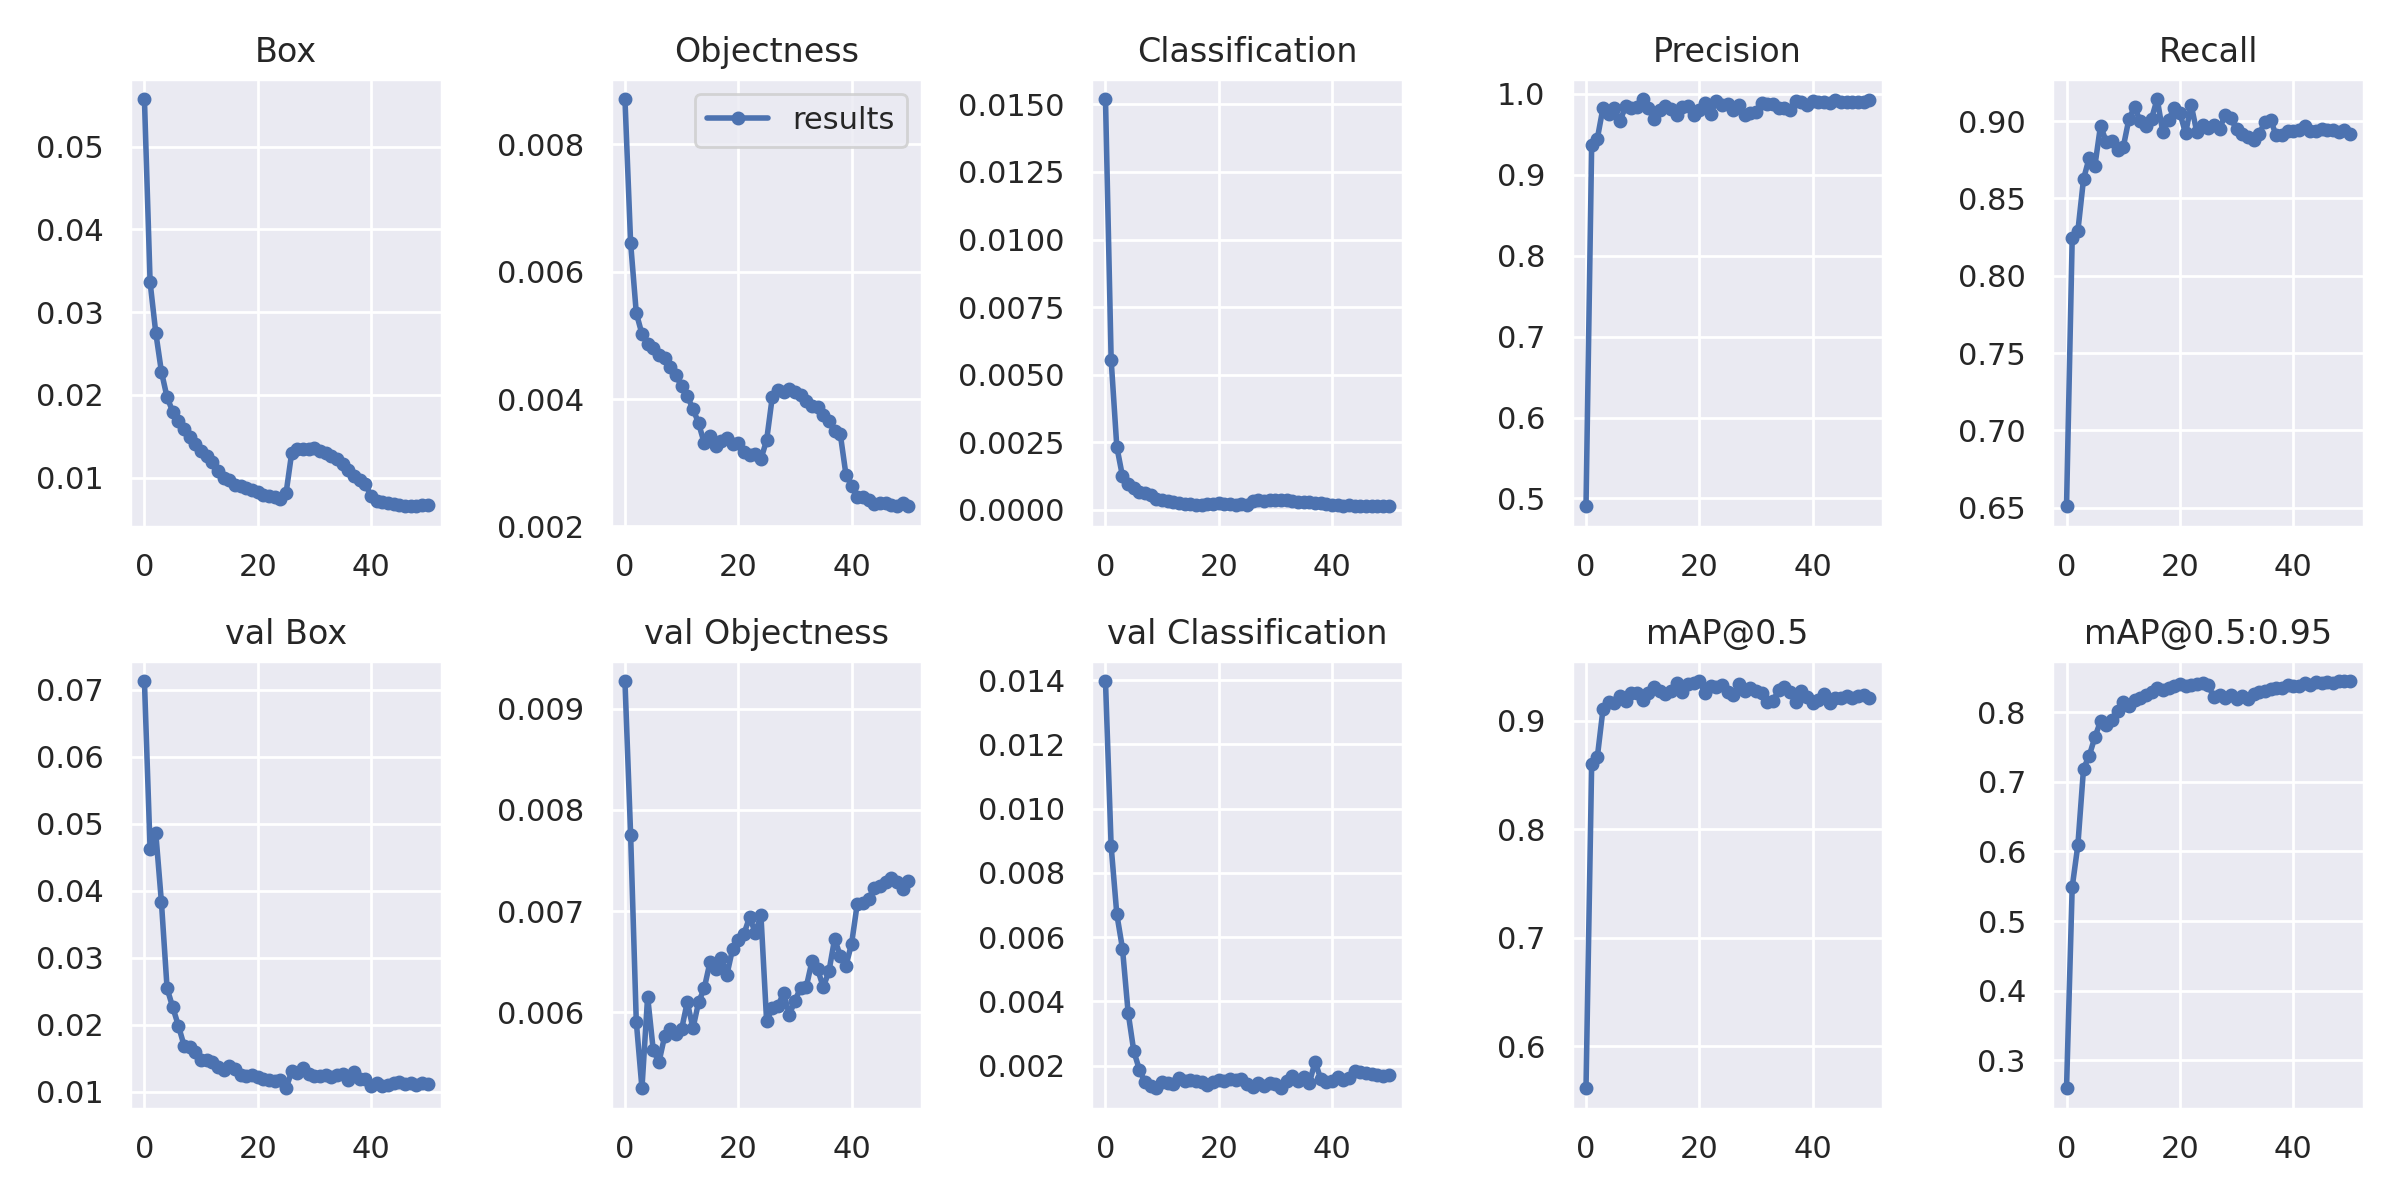

In [ ]:
from IPython.display import Image

# 학습 결과 시각화된 그래프 보기
# 학습이 도중에 종료되었으면 result.png 파일은 없음
Image('/content/runs/train/mixed_training_v2_finetune3/results.png')

## 평가

In [ ]:
# 학습 상태 확인
import os

mixed_path = "/content/runs/train/mixed_training_v2_finetune3"

print("🔍 Mixed training 상태 확인:")

# weights 폴더 내용 확인
weights_path = f"{mixed_path}/weights"
if os.path.exists(weights_path):
    weights_files = os.listdir(weights_path)
    print(f"⚖️  weights 폴더 내용: {weights_files}")

    for file in weights_files:
        file_path = f"{weights_path}/{file}"
        if os.path.exists(file_path):
            size_mb = os.path.getsize(file_path) / (1024*1024)
            print(f"  - {file}: {size_mb:.1f} MB")

# results.txt 확인 (학습 진행상황)
results_file = f"{mixed_path}/results.txt"
if os.path.exists(results_file):
    print(f"\n📊 학습 결과 (마지막 5줄):")
    with open(results_file, 'r') as f:
        lines = f.readlines()
        for line in lines[-5:]:
            print(f"  {line.strip()}")
else:
    print(f"❌ results.txt 없음")

# 학습 로그 확인
log_files = [f for f in os.listdir(mixed_path) if f.endswith('.log') or 'train' in f]
print(f"\n📝 로그 파일들: {log_files}")

🔍 Mixed training 상태 확인:
⚖️  weights 폴더 내용: ['epoch_049.pt', 'epoch_048.pt', 'epoch_052.pt', 'best.pt', 'epoch_051.pt', 'last.pt', 'init.pt', 'epoch_050.pt']
  - epoch_049.pt: 284.9 MB
  - epoch_048.pt: 284.9 MB
  - epoch_052.pt: 284.9 MB
  - best.pt: 284.8 MB
  - epoch_051.pt: 284.9 MB
  - last.pt: 284.8 MB
  - init.pt: 142.4 MB
  - epoch_050.pt: 284.9 MB

📊 학습 결과 (마지막 5줄):
  46/52     7.48G  0.006621   0.00236 0.0001354  0.009116         7       416    0.9899    0.8944    0.9225    0.8432   0.01121  0.007283  0.001767
  47/52     7.48G  0.006532   0.00234 0.0001292     0.009         0       416    0.9904    0.8941    0.9213    0.8422   0.01129  0.007327  0.001747
  48/52     7.48G  0.006541  0.002316 0.0001285  0.008985         2       416    0.9905    0.8929    0.9226     0.844   0.01105  0.007291  0.001696
  49/52     7.48G  0.006672  0.002365 0.0001381  0.009175         0       416    0.9897    0.8944    0.9236    0.8446   0.01126  0.007222  0.001678
  50/52     7.48G  0.006659  0.

In [ ]:
# Real test set 재평가 (Mixed training 모델)
%cd /content
!python yolov7/test.py \
    --weights /content/runs/train/mixed_training_v2_finetune3/weights/best.pt \
    --data real_data.yaml \
    --batch-size 16 \
    --img-size 416 \
    --task test \
    --device 0 \
    --save-txt \
    --save-conf \
    --name real_test_mixed_eval

/content
Namespace(weights=['/content/runs/train/mixed_training_v2_finetune3/weights/best.pt'], data='real_data.yaml', batch_size=16, img_size=416, conf_thres=0.001, iou_thres=0.65, task='test', device='0', single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project='runs/test', name='real_test_mixed_eval', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GF